# Librerias y data

In [36]:
import pandas as pd
import numpy as np
import re
import demoji
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [55]:
df_reviews = pd.read_csv("data/reviews.csv", sep=";", parse_dates=["date"])
df_lodgings = pd.read_csv("data/lodgings.csv", sep=";")

df = df_reviews.merge(df_lodgings, on="lodging_id")

In [56]:
df.shape

(36239, 11)

In [2]:
nltk.download('stopwords') # DESCARGAR UNA VEZ
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\ASUS
[nltk_data]     X515\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ASUS
[nltk_data]     X515\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stopwords_nltk = stopwords.words('english') + list(["hotel", "positive", "negative"])

In [57]:
np.array(stopwords_nltk)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

# Transformacion

In [45]:
def remove_stopwords(text):
    if text is None:
        return ""  # Devolver una cadena vacía si el texto es None o está vacío   
    # Utilizar una expresión regular para tokenizar el texto preservando las palabras con apóstrofes
    tokenizer = RegexpTokenizer(r'\w+\'\w+|\w+')
    tokens = tokenizer.tokenize(text)
    
    filtered_sentence = []
    for token in tokens:
        if token.lower() not in stopwords_nltk:
            filtered_sentence.append(token)
    text = ' '.join(filtered_sentence)
    # BORRAR CARACTERES NO ALFANUMERICOS
    text = re.sub(r'[^\w\s]', '', text)
    return text

def cleaning_text(text):
# TRATAR TRADUCCIONES EN REVIEWS, BORRA EL STRING "(ORIGINAL)" Y TODO A SU DERECHA
  keyword = "(Original)"
  keyword_index = text.find(keyword) # Encontrar la posición de la palabra clave
  if keyword_index != -1:
      text = text[:keyword_index + len(keyword)] # Eliminar todo después de la palabra clave

  text = text.replace("(Original)", "")
  text = text.replace("(Translated by Google)", "")

# TRATAR EMOJIS
  text = demoji.replace_with_desc(text, ' ') # reemplaza los emojis con palabras mas un espacio entre si

# BORRAR SALTOS DE LINEA
  text = text.replace("\n", " ")
# BORRAR ESPACIOS AL PRINCIPIO Y AL FINAL Y CONVERTIR A MINUSCULAS
  text = text.strip()
  text = text.lower()
# DESPUES DE LIMPIADO VERIFICAR SI HAY CARACTERES O NO, SI NO HAY CONVERTIRLOS EN NULO
  if not text:
      return None
  return text

In [58]:
df["cleaned"] = [cleaning_text(x) for x in df["review"]]

In [59]:
df["transformed"] = [remove_stopwords(x) for x in df["cleaned"]]

In [60]:
df["transformed"]

0        good pinch availability days baby roach hoards...
1        getting much better sweet receptionists securi...
2        best ive seen property years riff raff securit...
3        true name budget suites lived 9yrs mngmnt n st...
4        friend live clean outside parking lot grounds ...
                               ...                        
36234    woken fire alarm 7 15 explanation apology noth...
36235                                wonderful holiday inn
36236    wonderful time one night stay front desk staff...
36237    worst parking room clean shower good great loc...
36238    beat location far subway walking distance time...
Name: transformed, Length: 36239, dtype: object

In [75]:
df.to_parquet("data/df_transformed.parquet", compression="gzip", index=False)

In [87]:
pd.to_datetime(df['date']).dt.year.min()

2005

In [85]:
from datetime import datetime

fecha_actual = datetime.now().date()

print(fecha_actual)


2023-09-02


# Wordclouds

In [62]:
df.head(3)

,review_id,lodging_id,guest_id,date,review,rating,lodging_code,lodging_name,latitude,longitude,state,cleaned,transformed
0,1,1,1,2021-08-08,Good for when you're in a pinch. More availabi...,3.0,0x80c8dae62e7dbaaf:0xd30feda3d0851444,The Suites Boulder Highway,36.116725,-115.067942,NV,good for when you're in a pinch. more availabi...,good pinch availability days baby roach hoards...
1,2,1,2,2021-03-16,Getting much better very sweet receptionists. ...,5.0,0x80c8dae62e7dbaaf:0xd30feda3d0851444,The Suites Boulder Highway,36.116725,-115.067942,NV,getting much better very sweet receptionists. ...,getting much better sweet receptionists securi...
2,3,1,3,2021-02-04,This is the best I've seen their property in y...,4.0,0x80c8dae62e7dbaaf:0xd30feda3d0851444,The Suites Boulder Highway,36.116725,-115.067942,NV,this is the best i've seen their property in y...,best ive seen property years riff raff securit...


In [63]:
ramada_df = df[df['lodging_name'].str.contains('Ramada', case=False)]

In [64]:
ramada_df.groupby(["lodging_code", "lodging_name"]).agg("count")

,,review_id,lodging_id,guest_id,date,review,rating,latitude,longitude,state,cleaned,transformed
lodging_code,lodging_name,,,,,,,,,,,
0x88c2e5a2ebb025a7:0x9a14452d84f10f2b,Ramada Clearwater Airport,9,9,9,9,9,9,9,9,9,9,9
0x89d373d8874f5df7:0x3c873465b0462ea1,Ramada Amherst/Getzville Hotel and Conference Center,13,13,13,13,13,13,13,13,13,13,13
0x89d6b356de5cf997:0xe57c81d729b0637e,Ramada Plaza by Wyndham Rochester Airport,48,48,48,48,48,48,48,48,48,48,48
ChIJ135FAZC4woARl-n5J1-_9Bc,Ramada by Wyndham Los Angeles/Koreatown West,335,335,335,335,335,335,335,335,335,335,335
ChIJQ2jYnfx-54gRWdztOAOGn9M,Ramada Plaza by Wyndham Orlando Resort & Suites Intl Drive,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617
ChIJV_pvpbu-woARQ85y4CokD4s,Ramada Plaza by Wyndham West Hollywood Hotel & Suites,873,873,873,873,873,873,873,873,873,873,873
ChIJXfjqkJZZwokRTwca33qw-00,Ramada by Wyndham New York Times Square West,301,301,301,301,301,301,301,301,301,301,301
ChIJY5H7s6SZ7ocRo0_nWCZdZj0,Ramada by Wyndham Reno Hotel & Casino,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301
ChIJZWXzpqG2woARMhdDcxEGQiU,Ramada by Wyndham Hawthorne/LA Stadium,5,5,5,5,5,5,5,5,5,5,5


In [65]:
df_filtrado = ramada_df[ramada_df['lodging_name'] == "Ramada by Wyndham Houston Intercontinental Airport South"]

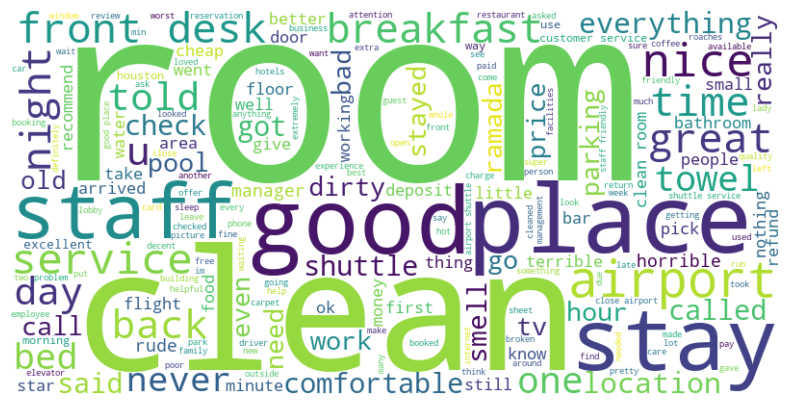

In [66]:
text = ' '.join(df_filtrado['transformed'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()